In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from utils import plot_images_full, generate_matrix, batch_dirichlet, get_similarities, plot_similarities, get_differences, plot_differences, get_images, plot_images

#from models.vit import ViT, SimpleViT, SimpleViTI, SimpleViTFT
from models.diffusion import SimpleTransformer

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
batch_size = 1
size = (3,32,32)
patch_size = 1
depth = 128
device = 'cpu'
data_path = './data/'

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
image = next(iter(val_loader))[0].to(device)

In [5]:
#plt.imshow(A0[0,:].reshape(32,32))

## $\mathbf{F}(t+1) = \tau \mathbf{A}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + \mathbf{F}(t)$

In [96]:
model = SimpleTransformer(size, depth, 10, sign=-1, tau=1, method='I',stdev=0.01)

In [97]:
outputs, attentions = model.diffuse(image)

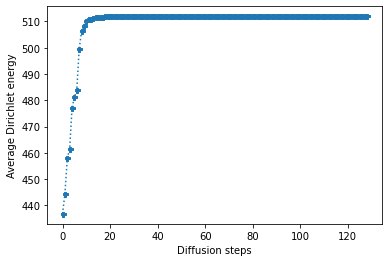

In [98]:
dirichlet_input = [x.cpu().detach().numpy()/np.linalg.norm(x.cpu().detach().numpy()) for x in outputs]
similarities = get_similarities(dirichlet_input)
plot_similarities(similarities)

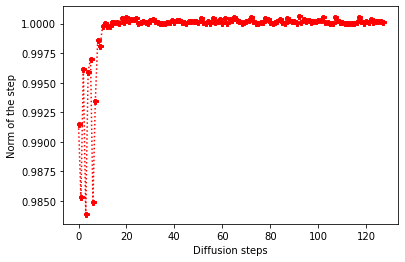

In [99]:
outputs = [x.cpu().detach().numpy() for x in outputs]
attentions = [x[0][0].reshape((1,32,32)).cpu().detach().numpy() for x in attentions]

differences = get_differences(outputs)
plot_differences(differences)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


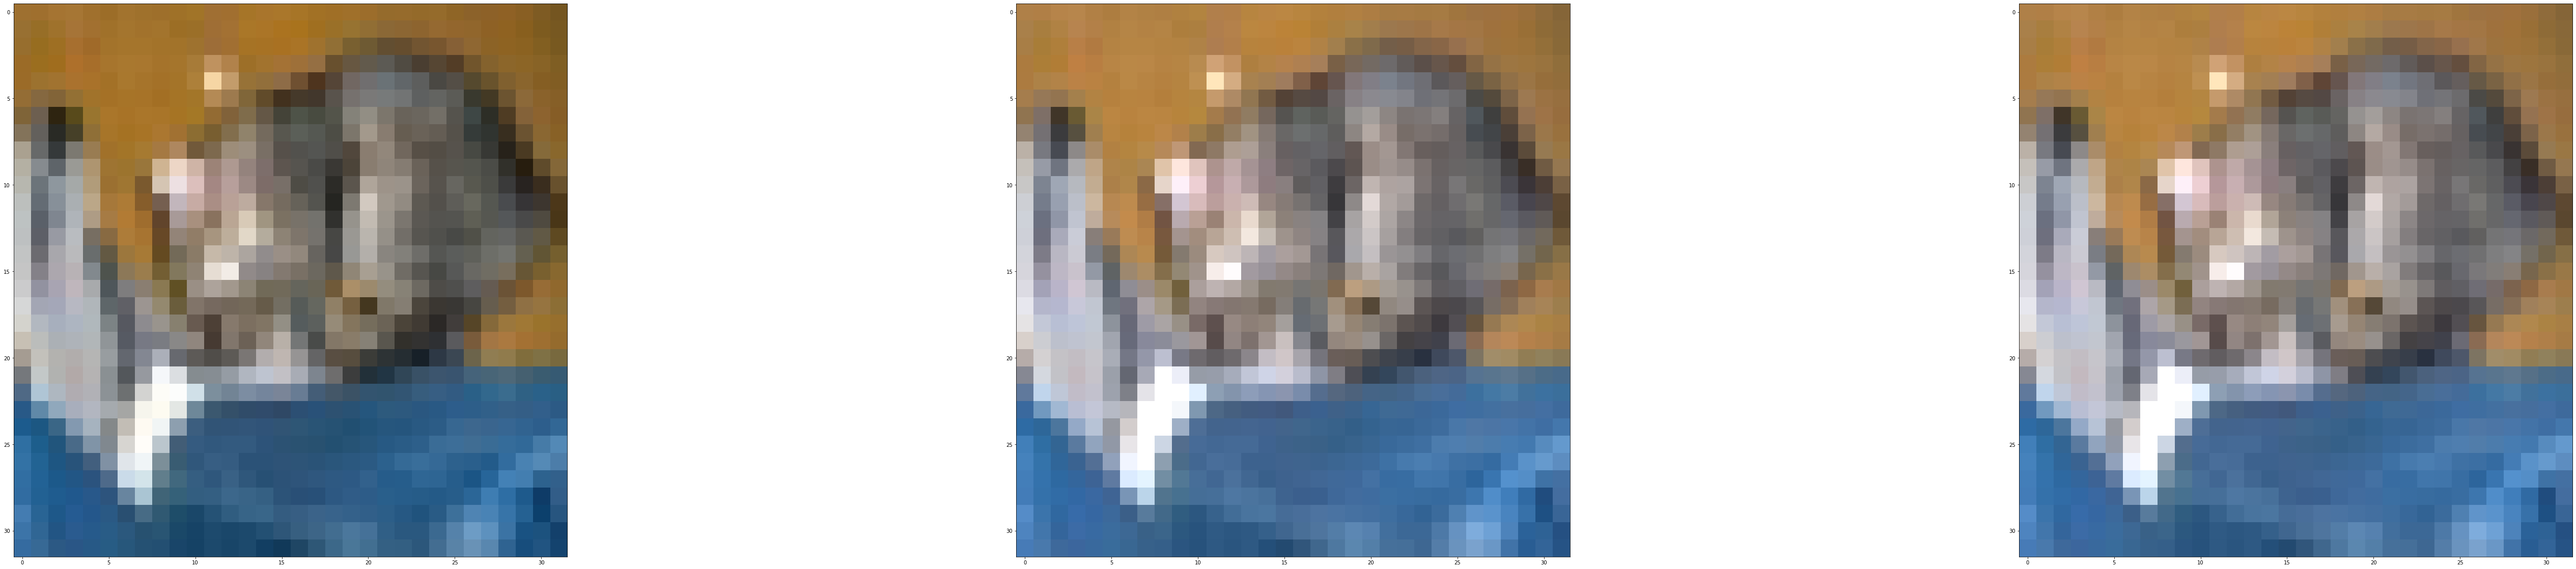

In [88]:
images = get_images(outputs)
plot_images_full([images[0],images[32],images[-1]])

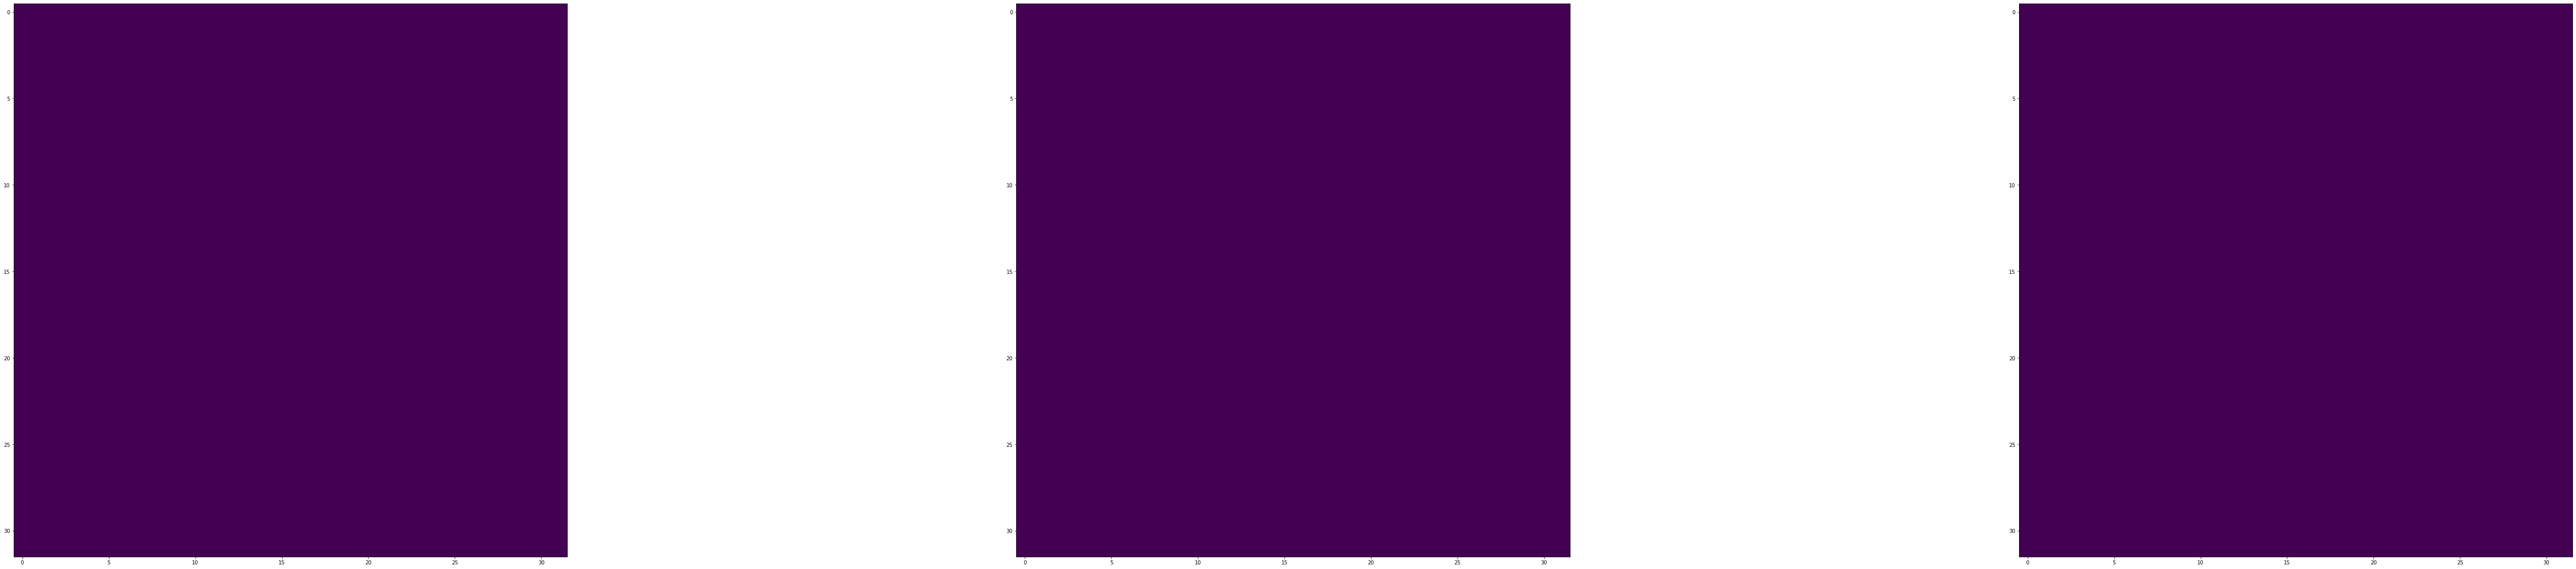

In [80]:
plot_images_full([attentions[0],attentions[32],attentions[-1]])

## $\mathbf{F}(t+1) = \tau \bar{\mathbf{A}}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + \mathbf{F}(t)$

In [20]:
outputs = get_output(X0,Ws,WKs,WVs,'I')

<ipython-input-3-f664a93b09bf>:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A = torch.nn.functional.softmax(torch.mm(query,key) * scale)


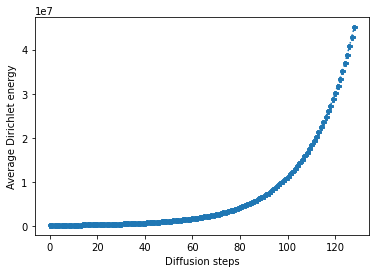

In [21]:
similarities = get_similarities(outputs)
plot_similarities(similarities)

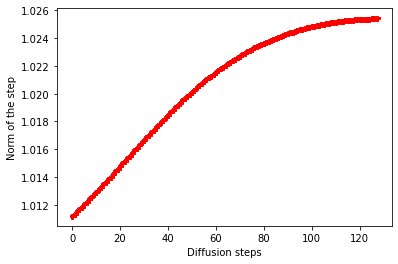

In [22]:
differences = get_differences(outputs)
plot_differences(differences)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


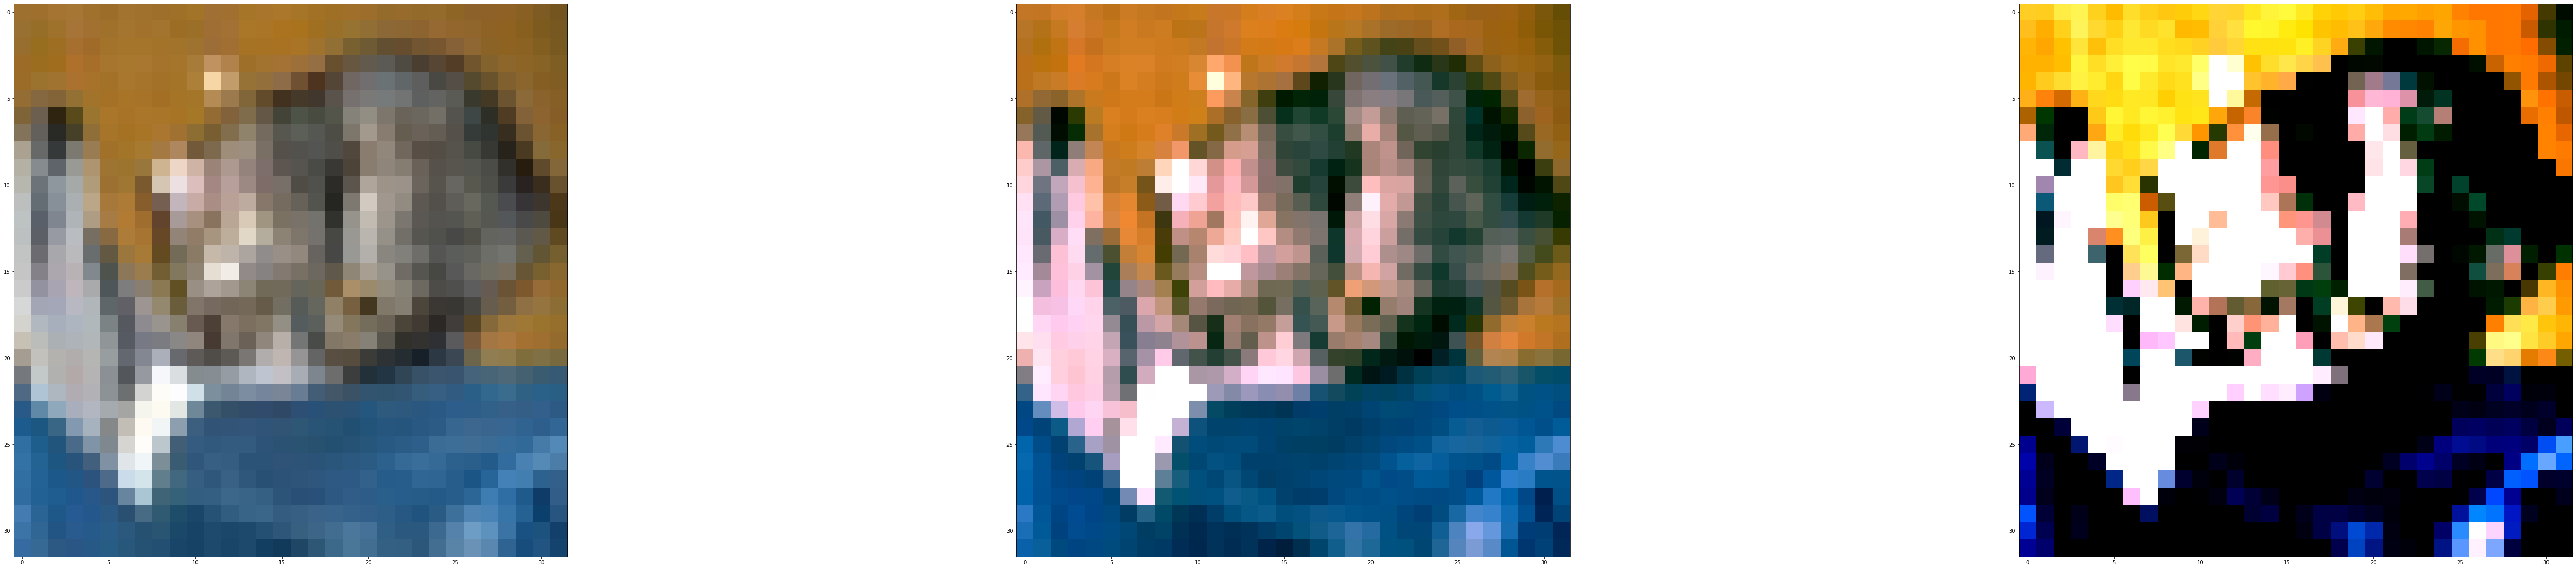

In [92]:
if patch_size == 1 and dim==3:
    images = get_images(outputs)
    plot_images_full([images[0],images[32],images[-1]])

## $\mathbf{F}(t+1) = \tau \mathbf{A}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + (1 - \tau) \mathbf{F}(t)$

In [93]:
outputs = get_output(X0,Ws,WKs,WVs,'FT')

<ipython-input-58-f664a93b09bf>:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A = torch.nn.functional.softmax(torch.mm(query,key) * scale)


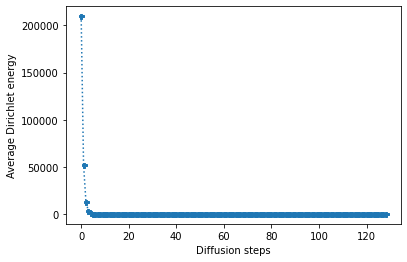

In [94]:
similarities = get_similarities(outputs)
plot_similarities(similarities)

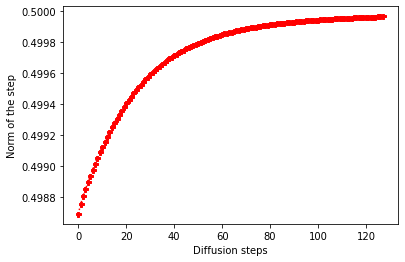

In [95]:
differences = get_differences(outputs)
plot_differences(differences)

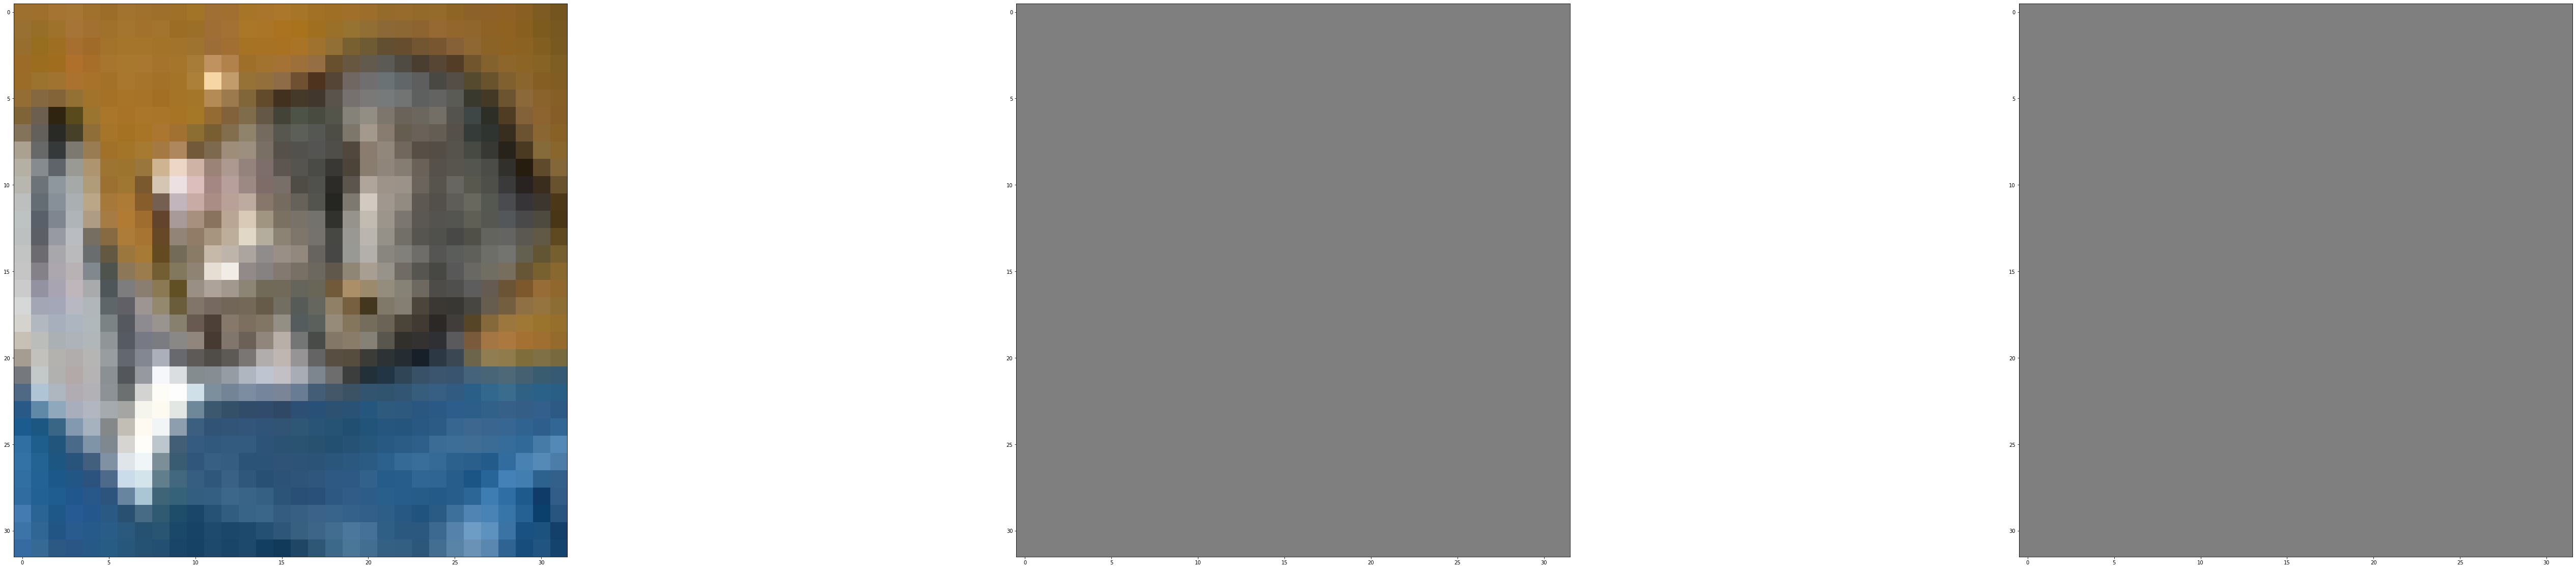

In [96]:
if patch_size == 1 and dim==3:
    images = get_images(outputs)
    plot_images_full([images[0],images[32],images[-1]])